## Horse Survival Dataset 
The goal of this project is to accurately predict the life or death outcome of a horse experiencing colic (abdominal pain). 

### Import Libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Assign Data to DataFrame

In [6]:
df = pd.read_csv('data_horse_colic.csv')

### Clean Data - Remove Unnecessary Columns and Rows

In [7]:
df_cleaned = df

In [8]:
# Look at dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [9]:
# Drop the hospital number column since it doesn't affect the outcome
df_cleaned.drop("hospital_number",axis=1, inplace=True)

In [10]:
# Drop the nasogatric_reflux_ph column since there isn't enough data (too many Null values)
df_cleaned.drop('nasogastric_reflux_ph',axis=1, inplace=True)

In [11]:
# Drop the rows where the horse was 'euthanized'. 
df_cleaned.drop(df[df['outcome'] == 'euthanized'].index, inplace = True)

In [12]:
df_cleaned.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
5,no,adult,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,depressed,...,NaN,NaN,NaN,NaN,lived,no,0,0,0,no


In [27]:
features = df_cleaned.columns
print(features[5])

temp_of_extremities


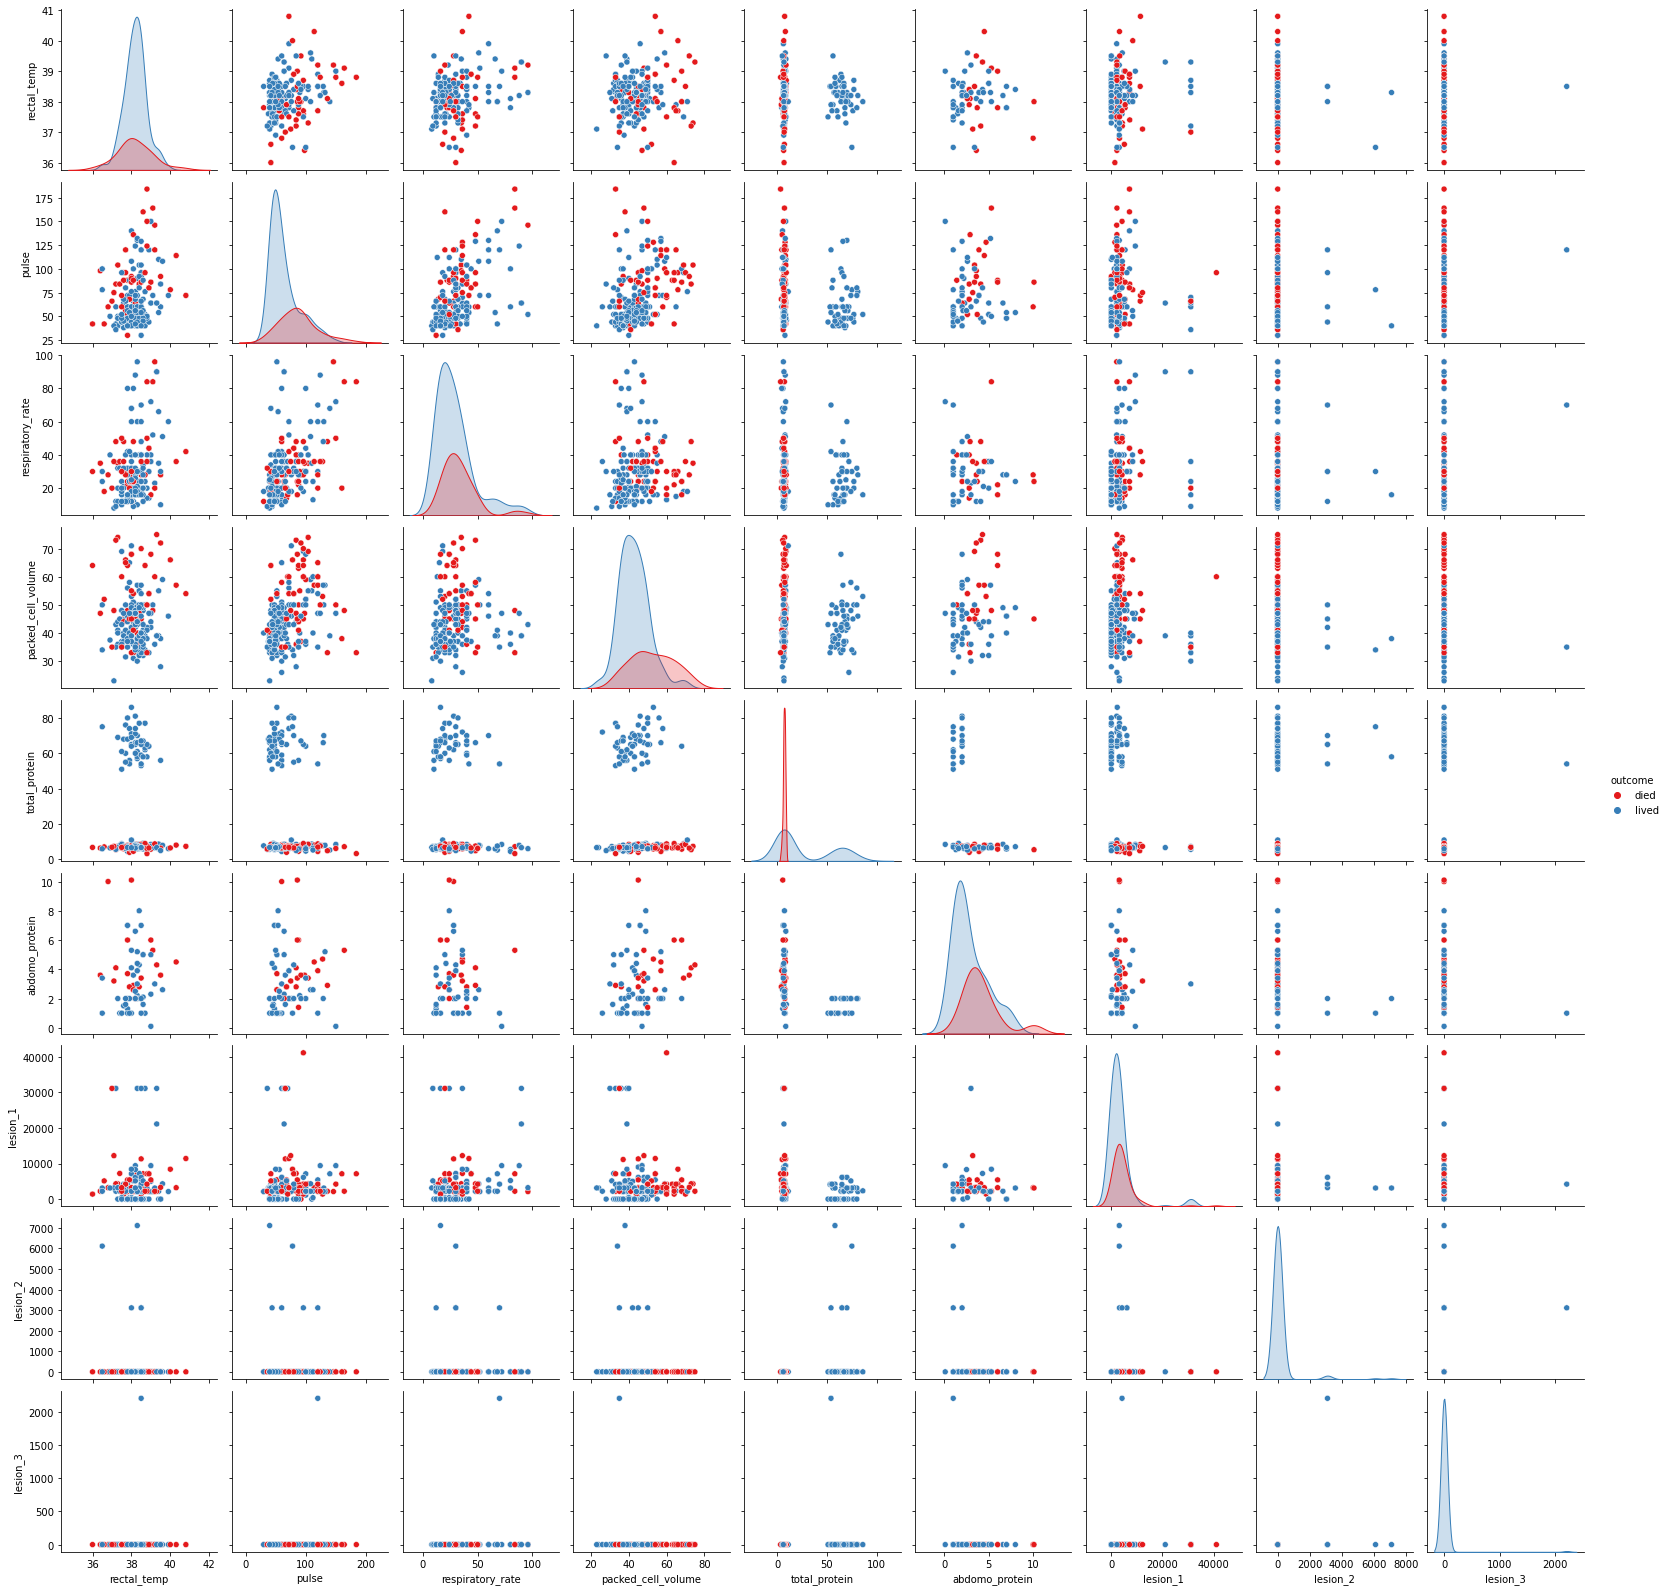

In [13]:
sns.pairplot(df_cleaned,hue="outcome",palette='Set1')

In [16]:
# Define histogram function to quickly generate a histogram comparing outcome with a feature

def histogram(feature,df):  
    plt.figure(figsize=(10,6))
    df[df['outcome']=='died'][feature].hist(alpha=0.5,color='red',
                                                  bins=30,label='Died')
    df[df['outcome']=='lived'][feature].hist(alpha=0.5,color='green',
                                                  bins=30,label='Survived')
    plt.legend()
    plt.xlabel(feature)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 720x432 with 0 Axes>

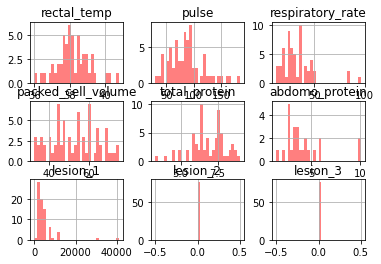

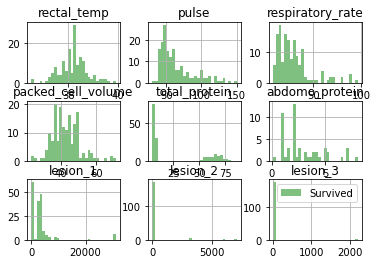

In [28]:
histogram(features,df_cleaned)